In [1]:
## Ada Boost with Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def AdaBoost(C1, C2, error, eta, M = 10):
  """
  Here is the implementation of the AdaBoost
  INPUT
  1.-Classes C1, C2
  2.-error for the theta
  3.-eta the step size for perceptron
  4.-M Number of Weak Learners
  OUTPUT
  1.- Theta List
  2.- Alpha List
  """
  # Get the dimension of the data  
  n1,m1 = C1.shape
  n2,m2 = C2.shape
  C1 = np.concatenate((np.ones([n1,1]),C1), axis = 1)  
  C2 = np.concatenate((np.ones([n2,1]),C2), axis = 1)
  # ThetaList
  ThetaList = list()
  # Unifrom Weights
  w1 = (1.0/float(n1+n2))*np.ones([n1,1])
  w2 = (1.0/float(n1+n2))*np.ones([n2,1])
  # Weights of correct incorrect errors
  W_e = 0
  W_c = 0
  W = 0
  alpha = list()
  # The building of the Machines
  for m in range(M):
    Theta = Perceptron(C1,C2, w1, w2, error, eta, m)
    W_c_1 =  np.sum(w1[C1.dot(Theta)>0])
    W_e_1 =  np.sum(w1[C1.dot(Theta)<=0])
    W_c_2 =  np.sum(w2[C2.dot(Theta)<0])
    W_e_2 =  np.sum(w2[C2.dot(Theta)>=0])
    
    W_c = W_c_1 + W_c_2
    W_e = W_e_1 + W_e_2
    W = W_c + W_e
    e_m = W_e/W
    c_e = np.sqrt((1.0-e_m)/e_m)
    c_c = np.sqrt(e_m/(1.0-e_m))
    # Here the weight update     
    w1[C1.dot(Theta)>0] = c_c*w1[C1.dot(Theta)>0]
    w1[C1.dot(Theta)<=0] = c_e*w1[C1.dot(Theta)<=0]
    w2[C2.dot(Theta)<0] = c_c*w2[C2.dot(Theta)<0]
    w2[C2.dot(Theta)>=0] = c_e*w2[C2.dot(Theta)>=0]
    # Reabalincding weigths into a Distribution
    Z = np.sum(w1)+np.sum(w2)
    w1 = (1.0/Z)*w1
    w2 = (1.0/Z)*w2
    # the Alpha for the Weak Learner
    alpha_m =(1.0/2.0)*np.log((1.0-e_m)/e_m)
    # Save the important infro
    ThetaList.append(Theta)
    alpha.append(alpha_m)
    print(' ')
    print('Probability of error {} by machine {}'.format(e_m,m))
    print('Alpha {} for machine {}'.format(alpha_m,m))
    print('Weight Correct  {} by machine {}'.format(W_c,m))
    print('Weight Incorrect {} by machine {}'.format(W_e,m))
    print(' ')
  return alpha, ThetaList


def Machine_Ada_Perceptron_Eval(X, alpha, ThetaList):
  """
  Here, I am assuming no extended classes
  with samples at the rows
  """
  # Get the size of them 
  nsamples, m = X.shape
  # The Calculated Output
  Y = np.zeros([nsamples,1])
  M = len(ThetaList)
  X_e = np.concatenate((np.ones([nsamples,1]),X), axis = 1)  
  for i in range(M):
    Y = Y + alpha[i]*np.tanh(X_e.dot(ThetaList[i]))
    
  return np.sign(Y) 

def Perceptron(C1,C2, w1, w2, error, eta, M, IterPrint=60000):
  """
  Here is the weak learner
  INPUT
    1.- C1 class 1
    2.- C2 class 2
    3.- w1 weights from AdaBoost for Class 1
    4.- w2 weights from AdaBoost for Class 2
    5.- error for stoping training
    6.- eta learning step
  OUTPUT
    1.- Theta the weihgts of the perceptron
  """  
  # Get the dimension of the data  
  n1,m1 = C1.shape
  n2,m2 = C2.shape
  # Get the labels for each class
  d1 = 1.0*np.ones([n1,1])
  d2 = -1.0*np.ones([n2,1])
  # Get the weight Theta
  OldTheta = 2*np.random.random_sample(m1)-1
  Theta = 2*np.random.random_sample(m1)-1
  # Convert it into a bidimensional array
  OldTheta.resize([m1,1])
  Theta.resize([m1,1])  
  # The errorwith respect to Theta 
  GE = DeltaTheta(OldTheta,Theta)
  # Counter
  count = 0
  # Printing Weak Learner type 
  print('Weak Learner Perceptron {}'.format(M))
  # The weighted classes
  #tC1 = w1*C1
  #tC2 = w2*C2
  # The main loop    
  while GE>error:
    # Get the activations
    y1 = np.tanh(np.matmul(C1,Theta)) 
    y2 = np.tanh(np.matmul(C2,Theta))
    # the derivatives of activation     
    cy1 = 1-y1**2
    cy2 = 1-y2**2
    # the weights against y for the AdaBoost
    y1 = w1*y1
    y2 = w2*y2
    # the weights against y for the AdaBoost 
    tC1 = w1*C1
    tC2 = w2*C2
    # The error
    e1 = d1 - y1 
    e2 = d2 - y2
    # Use Brodcasting
    ne1 = (e1*cy1)*tC1
    ne2 = (e2*cy2)*tC2
    # The first part of the gradient
    TotalG = np.sum(ne1.T, axis=1)
    TotalG = TotalG + np.sum(ne2.T, axis=1)
    TotalG = (1.0/float(n1+n2))*TotalG.T
    TotalG.resize([m1,1])  
    OldTheta = Theta
    Theta = Theta - eta*TotalG
    GE = DeltaTheta(OldTheta,Theta)
    count+=1
    if count%IterPrint==0:
      print('Iteration i={} - error={}'.format(count, GE))
  return Theta


def DeltaTheta(OldTheta, Theta):
  """
  Delta Theta
  """
  return ((Theta-OldTheta).T).dot(Theta-OldTheta)[0][0] 
  
def LinearSearchPerceptron():
  return 1

In [2]:
def gen_line(w,minr,maxr,nsamp):
    # Generate samples for x
    y = np.array(np.linspace(minr,maxr,nsamp))
    # Generate the samples for y
    x = -w[0,0]/w[2,0]-(w[1,0]/w[2,0])*y
    return x,y

def class1(numsamp, mu, theta,scalex,scaley):
    # Define the covariance
    R = np.matrix([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    S = np.matrix([[scalex, 0.0],[0.0,scaley]])
    cov = R*S*S*np.transpose(R)
    x, y = np.random.multivariate_normal(mu, cov, numsamp).T
    return x,y


In [3]:
from tabulate import tabulate

def gen_line(w,minr,maxr,nsamp):
  """
  Getting x and y for the weak learner
  """    
  #Generate samples for x
  y = np.array(np.linspace(minr,maxr,nsamp))
  # Generate the samples for y
  x = -w[0,0]/w[2,0]-(w[1,0]/w[2,0])*y
  return x,y
    
def Test_1(nC1,nC2):
  """
  Building the First Test
  """
  #Class1
  x1,y1 = class1(nC1, [-2.2,1.0], np.pi/8.0 ,2.0,0.5)    
  #Class2
  x2,y2 = class1(nC2, [2.2,-1.0], np.pi/4.0 ,2.0,1.0)
  C1 = (np.stack((x1,y1),axis = 0)).T
  C2 = (np.stack((x2,y2),axis = 0)).T     
  return C1,C2

def class1(numsamp, mu, theta,scalex,scaley):
  """
  Class 1 type
  """    
  #Define the covariance
  R = np.matrix([[np.cos(theta), -np.sin(theta)],[np.sin(theta), 
                  np.cos(theta)]])
  S = np.matrix([[scalex, 0.0],[0.0,scaley]])
  cov = R*S*S*np.transpose(R)
  x, y = np.random.multivariate_normal(mu, cov, numsamp).T
  return x,y

def Test_2(N):
  """
  Bulding Test Two
  """
  C1,C2 = class2(N, np.zeros(2), 4*np.eye(2), 2.0, 2.3)  
  nC1,m1 = C1.shape
  nC2,m1 = C2.shape  
  return C1, C2, nC1,nC2

def DrawingClasses(C1,C2,ThetaList, M, nslinea):
  plt.figure()
  plt.plot(C1[:,0], C1[:,1], 'bx')
  plt.plot(C2[:,0], C2[:,1], 'ro')
  
  # Find the Straihg Line
  # Find the min and max of x coordinate
  minr = np.amin(np.concatenate((C1[:,0].T,C2[:,0].T)))
  maxr = np.amax(np.concatenate((C1[:,1].T,C2[:,1].T)))

  for i in range(M): 
    x,y = gen_line(ThetaList[i],minr,maxr,nslinea )
    plt.plot(x, y, 'g')  
  
  plt.axis('equal')

def class2(N,mu, sigma, r1,r2):
  """
  Building a Ring Example
  """
  x,y = np.random.multivariate_normal(mu,sigma, N).T
  C = (np.stack((x,y),axis = 0)).T
  Value =  np.sqrt(np.sum(C*C,axis=1))
  mask = (Value>r2) & (Value<6.0)
  C1 = C[mask]
  C2 = C[Value<r1]
  
  return C1, C2
  
def Confusion_Matrix(Y1,Y2):
  """
  Print the Confusion Matrix
  """
  P,M1 = Y1.shape 
  N,M2 = Y2.shape
  TP = np.sum(1*(Y1>0))
  TN = np.sum(1*(Y2<0))
  FP = np.sum(1*(Y1<=0))
  FN = np.sum(1*(Y2>=0))
  print('{}'.format(15*'='))
  print('Confusion Matrix')
  print('{}'.format(20*'='))
  print(tabulate([['C1', TP , FP], ['C2', FN, TN]], headers=['', 'C1', 'C2']))
  print('{}'.format(20*'='))
  print(' ')
  print('{}'.format(20*'='))
  print('Confusion Matrix As Probabilities')
  print('{}'.format(20*'='))
  print(tabulate([['C1', '{0:0.2f}'.format(float(TP)/float(P)) ,
                  '{0:0.2f}'.format(float(FP)/float(P))  ],
                   ['C2', '{0:0.2f}'.format(float(FN)/float(N)) , 
                   '{0:0.2f}'.format(float(TN)/float(N)) ]],
                    headers=['', 'C1', 'C2']))
  print('{}'.format(20*'='))

 
TEST 2
 
Weak Learner Perceptron 0
 
Probability of error 0.6018930957683741 by machine 0
Alpha -0.20667963747260024 for machine 0
Weight Correct  0.39810690423162587 by machine 0
Weight Incorrect 0.6018930957683741 by machine 0
 
Weak Learner Perceptron 1
 
Probability of error 0.600234178402541 by machine 1
Alpha -0.2032204733731605 for machine 1
Weight Correct  0.39976582159745894 by machine 1
Weight Incorrect 0.600234178402541 by machine 1
 
Weak Learner Perceptron 2
 
Probability of error 0.5508438846513789 by machine 2
Alpha -0.10204045755090572 for machine 2
Weight Correct  0.4491561153486211 by machine 2
Weight Incorrect 0.5508438846513789 by machine 2
 
Weak Learner Perceptron 3
 
Probability of error 0.5718868691702436 by machine 3
Alpha -0.1447768528123823 for machine 3
Weight Correct  0.4281131308297563 by machine 3
Weight Incorrect 0.5718868691702435 by machine 3
 
Weak Learner Perceptron 4
 
Probability of error 0.5264512278758828 by machine 4
Alpha -0.052951890958901 f

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


 
Probability of error 0.5821098920355412 by machine 39
Alpha -0.16572037474201015 for machine 39
Weight Correct  0.41789010796445875 by machine 39
Weight Incorrect 0.5821098920355412 by machine 39
 
Confusion Matrix
      C1    C2
--  ----  ----
C1  5087     0
C2     0  3893
 
Confusion Matrix As Probabilities
      C1    C2
--  ----  ----
C1     1     0
C2     0     1


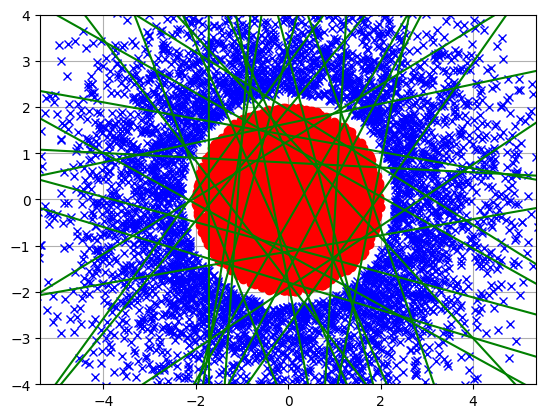

In [4]:
print(' ')  
print('TEST 2')
print(' ')
N = 10000
C3, C4, nC3,nC4 = Test_2(N)
# Training the Weak Learners
# For the lines
nslinea = 10
error = 1/10.0**7
eta   = 100.00
M = 40
alpha, ThetaList =  AdaBoost(C3, C4, error, 
                           eta, M) 
                           
DrawingClasses(C3,C4, ThetaList, M, nslinea) 
Y1 = Machine_Ada_Perceptron_Eval(C3, alpha, ThetaList) 
Y2 = Machine_Ada_Perceptron_Eval(C4, alpha, ThetaList) 
Confusion_Matrix(Y1,Y2)
#############################################
plt.grid()
plt.ylim((-4, 4))
plt.xlim((-5, 5))
plt.show()                             
        

## The standard case - using sklearn

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# For simplicity, let's classify only two classes
# Select only class 0 and 1
X = X[y != 2]
y = y[y != 2]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost with 50 weak learners
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
ada.fit(X_train, y_train)

# Make predictions
y_pred = ada.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

